# Exploratory Data Analysis on Retail Store Datasets

## Name: Bhavesh Bhagria Student ID: 21262891

## Name: Tanmay Potbhare Student ID: 21262012


## Problem Statement



What all business problems you can derive by exploring the data?

In [1]:
#Import all the necessary libraries\
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the CSV dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Check for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
#Print the unique values to understand the contents of the dataset
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Country'].unique())
print(df['State'].unique())
print(df['State'].nunique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
49


In [5]:
#Same step as Above
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [6]:
#Get the number of unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
#Get the necessary statistical data
df=df.drop('Postal Code', axis=1)
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#Get the information oabout the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


# Data Pre-Processing

In [9]:
#Check for correlation between data
df=df.drop(['Country','City'], axis=1)
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

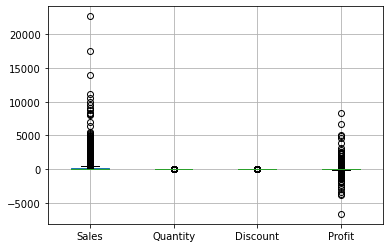

In [10]:
df.boxplot()

In this correlation table, we notice that Sales and Profit both have negative correlateion with Discount. We can assume that because of discount, there are losses

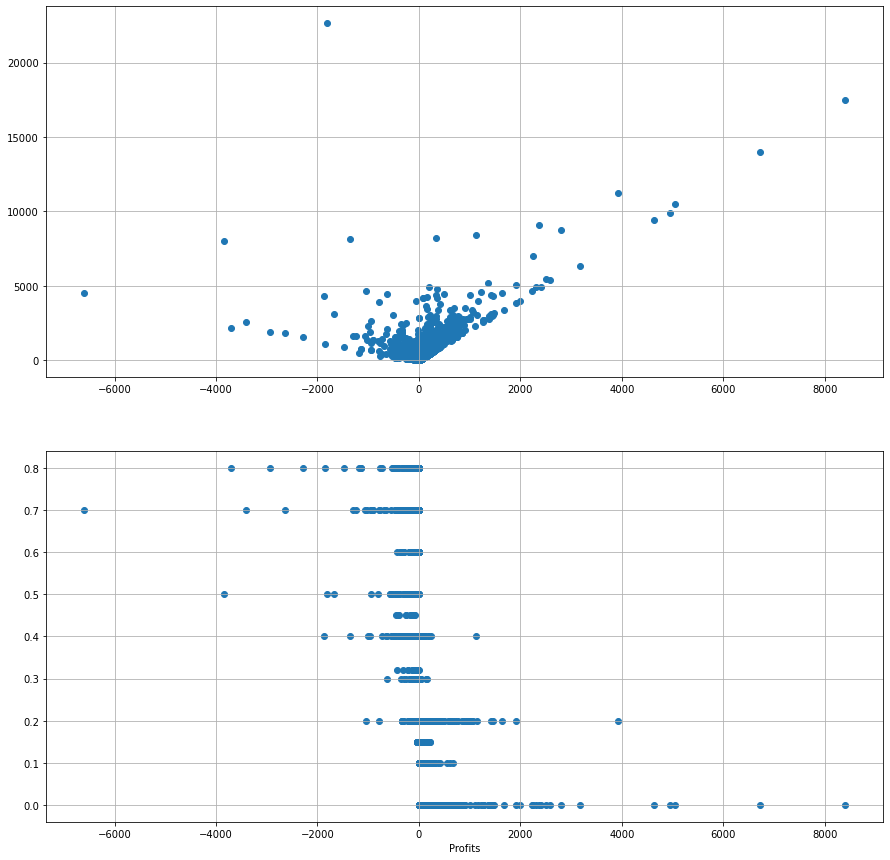

In [11]:
fig, ax=plt.subplots(2,1,figsize=(15,15))
#plot 1:
x = df['Profit']
y1 = df['Sales']
y2 = df['Discount']

ax[0].scatter(x,y1)
ax[0].grid()

ax[1].scatter(x,y2)
ax[1].sharex(ax[0])
ax[1].grid()

plt.xlabel('Profits')
plt.show()


In [12]:
z = np.abs(stats.zscore(df['Sales']))
z1 = np.abs(stats.zscore(df['Profit']))

#Detecting Outliers
print(np.where(z>3))
print(np.where(z1>3))
print(z[27])
print(z1[27])

(array([  27,  165,  251,  262,  263,  318,  353,  399,  487,  509,  515,
        683,  977,  994, 1001, 1085, 1155, 1246, 1438, 1454, 1644, 1791,
       1803, 1805, 2182, 2418, 2492, 2505, 2567, 2623, 2624, 2697, 2848,
       3011, 3055, 3070, 3273, 3280, 3443, 3569, 3580, 3983, 3986, 4093,
       4098, 4128, 4190, 4218, 4277, 4297, 4619, 4865, 4881, 5006, 5126,
       5170, 5198, 5300, 5320, 5530, 5562, 5626, 5710, 5884, 5917, 5990,
       6010, 6014, 6099, 6101, 6116, 6209, 6340, 6425, 6520, 6534, 6535,
       6620, 6626, 6817, 6826, 6868, 6884, 6901, 7173, 7243, 7280, 7474,
       7487, 7579, 7583, 7666, 7683, 7772, 7818, 7914, 7937, 8100, 8102,
       8153, 8204, 8236, 8271, 8312, 8424, 8468, 8488, 8680, 8699, 8749,
       8858, 8892, 8990, 9039, 9056, 9165, 9270, 9412, 9425, 9639, 9649,
       9660, 9741, 9774, 9857, 9929, 9948], dtype=int64),)
(array([  27,  165,  215,  318,  353,  463,  509,  515,  683,  869,  910,
        994, 1001, 1085, 1199, 1369, 1454, 1644, 1803, 1896, 19

In [13]:
#Removing Outliers
df.drop(df.loc[np.abs(np.abs(stats.zscore(df['Sales']))>3)].index, inplace=True)
df.drop(df.loc[np.abs(np.abs(stats.zscore(df['Profit']))>3)].index, inplace=True)
df

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200


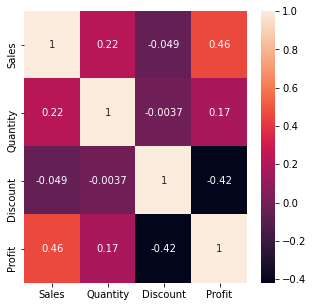

In [14]:
fig, ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(df.corr(method='kendall'), annot=True)

The above heatmap shows us that Profits, sales and quantity have negative corr with discount.

C:\Users\bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

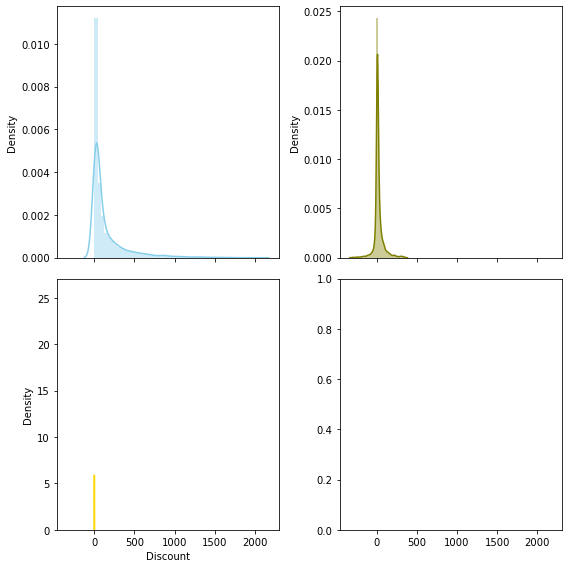

In [15]:
#Check for distribution
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.distplot(df['Sales'], color="skyblue", ax=axes[0,0])
sns.distplot(df['Profit'], color="olive", ax=axes[0,1])
sns.distplot(df['Discount'], color="gold", ax=axes[1,0])
plt.tight_layout()

Through the above boxplots, we get to know that Central and the East regions have the most losses

In [16]:
df_south=pd.DataFrame()
df_south=df.where(df['Region']=='South')

#West Region
df_west=pd.DataFrame()
df_west=df.where(df['Region']=='West')

#Central Region
df_central=pd.DataFrame()
df_central=df.where(df['Region']=='Central')

#East Region
df_east=pd.DataFrame()
df_east=df.where(df['Region']=='East')

# Exploratory Data Analysis

The Standard Class shipping mode has the highest number of sales and profits whereas the Same day shipping Mode has the least number of sales and Profits. None of the shipping modes have any losses.

## South Region

<AxesSubplot:title={'center':'Sub-Category v/s Sales and Profit'}, xlabel='Sub-Category', ylabel='Profit'>

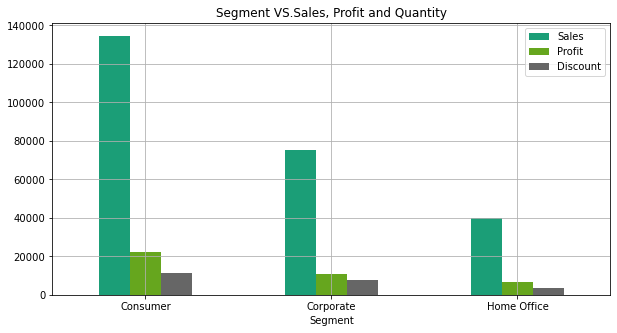

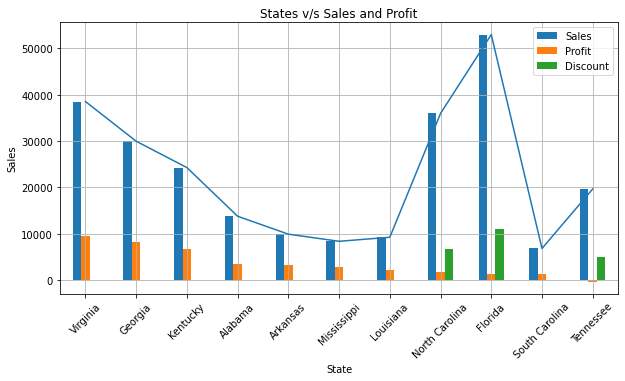

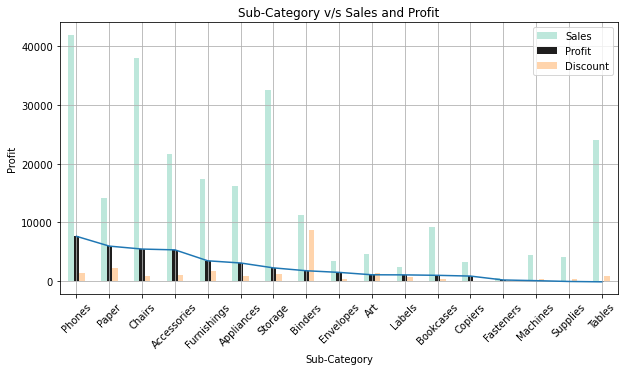

In [17]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Customer Segments with Sales and profits column.

segment_south=df_south.groupby('Segment')[['Sales','Profit','Discount']].sum()
segment_south['Discount']=segment_south['Discount']*100
segment_south.plot(kind='bar', grid=True,figsize=(10,5), title='Segment VS.Sales, Profit and Quantity', fontsize=10, colormap='Dark2', rot=0)

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group American States with Sales and profits column.
state_south_prof=df_south.groupby('State')[['Sales', 'Profit','Discount']].sum()
state_south_prof=state_south_prof.sort_values(by=['Profit'], ascending=False)
state_south_prof['Discount']=state_south_prof['Discount']*100
state_south_prof.plot(kind='bar', grid=True, figsize=(10,5), title='States v/s Sales and Profit',rot=45)
sns.lineplot(data=state_south_prof['Sales'])

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Sub Categories with Sales and Profits column.
sub_cat_south=df_south.groupby('Sub-Category')[['Sales','Profit', 'Discount']].sum()
sub_cat_south=sub_cat_south.sort_values(by=['Profit'], ascending=False)
sub_cat_south['Discount']=sub_cat_south['Discount']*100
sub_cat_south.plot(kind='bar', grid=True, figsize=(10,5), title='Sub-Category v/s Sales and Profit', colormap='icefire', rot=45)
sns.lineplot(data=sub_cat_south['Profit'])


## West Region

<AxesSubplot:title={'center':'Sub-Category v/s Sales and Profit'}, xlabel='Sub-Category', ylabel='Profit'>

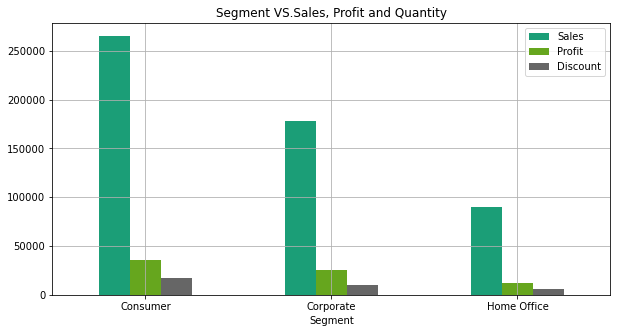

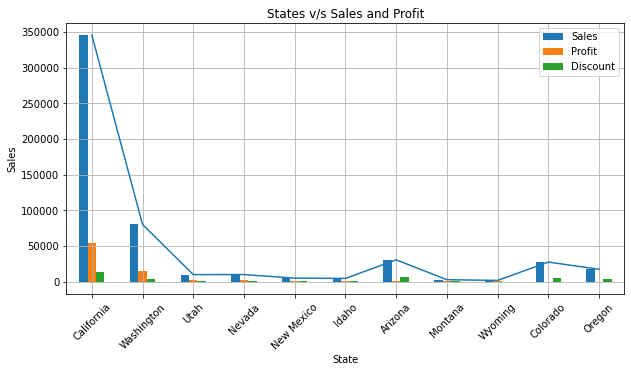

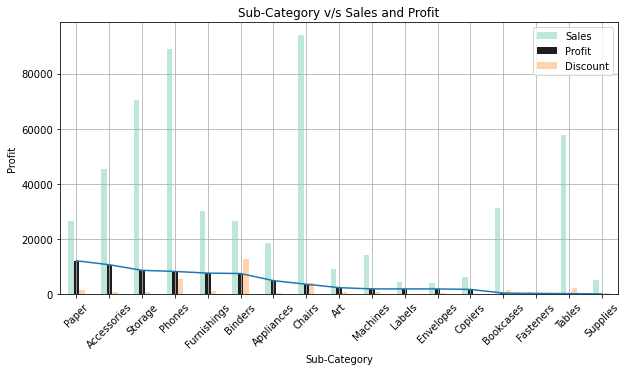

In [18]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Customer Segments with Sales and profits column.
segment_west=df_west.groupby('Segment')[['Sales','Profit','Discount']].sum()
segment_west['Discount']=segment_west['Discount']*100
segment_west.plot(kind='bar', grid=True,figsize=(10,5), title='Segment VS.Sales, Profit and Quantity', fontsize=10, colormap='Dark2', rot=0)

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group American States with Sales and profits column.
state_west_prof=df_west.groupby('State')[['Sales', 'Profit','Discount']].sum()
state_west_prof=state_west_prof.sort_values(by=['Profit'], ascending=False)
state_west_prof['Discount']=state_west_prof['Discount']*100
state_west_prof.plot(kind='bar', grid=True, figsize=(10,5), title='States v/s Sales and Profit',rot=45)
sns.lineplot(data=state_west_prof['Sales'])

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Sub Categories with Sales and Profits column.
sub_cat_west=df_west.groupby('Sub-Category')[['Sales','Profit', 'Discount']].sum()
sub_cat_west=sub_cat_west.sort_values(by=['Profit'], ascending=False)
sub_cat_west['Discount']=sub_cat_west['Discount']*100
sub_cat_west.plot(kind='bar', grid=True, figsize=(10,5), title='Sub-Category v/s Sales and Profit', colormap='icefire', rot=45)
sns.lineplot(data=sub_cat_west['Profit'])


## Central Region

<AxesSubplot:title={'center':'Sub-Category v/s Sales and Profit'}, xlabel='Sub-Category', ylabel='Profit'>

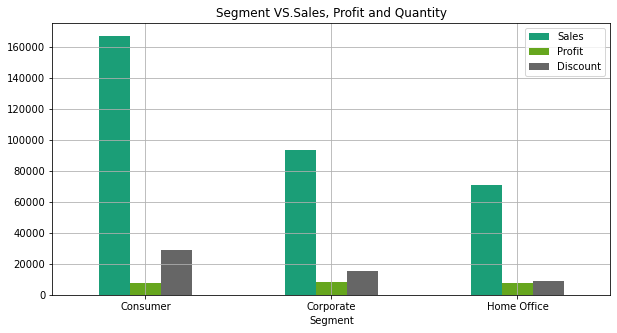

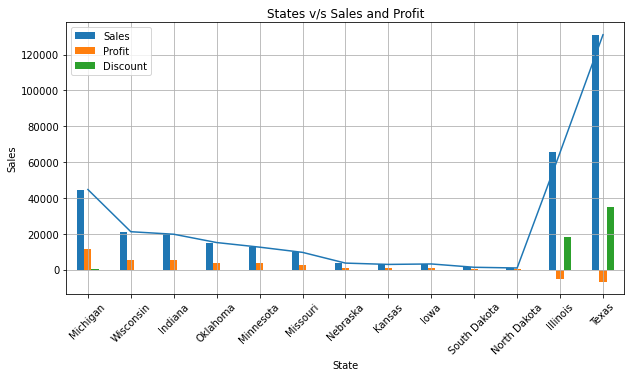

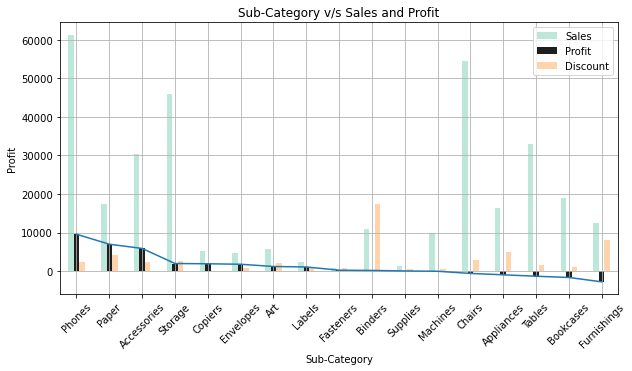

In [19]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Customer Segments with Sales and profits column.
segment_central=df_central.groupby('Segment')[['Sales','Profit','Discount']].sum()
segment_central['Discount']=segment_central['Discount']*100
segment_central.plot(kind='bar', grid=True,figsize=(10,5), title='Segment VS.Sales, Profit and Quantity', fontsize=10, colormap='Dark2', rot=0)

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group American States with Sales and profits column.
state_central_prof=df_central.groupby('State')[['Sales', 'Profit','Discount']].sum()
state_central_prof=state_central_prof.sort_values(by=['Profit'], ascending=False)
state_central_prof['Discount']=state_central_prof['Discount']*100
state_central_prof.plot(kind='bar', grid=True, figsize=(10,5), title='States v/s Sales and Profit',rot=45)
sns.lineplot(data=state_central_prof['Sales'])

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Sub Categories with Sales and Profits column.
sub_cat_central=df_central.groupby('Sub-Category')[['Sales','Profit', 'Discount']].sum()
sub_cat_central=sub_cat_central.sort_values(by=['Profit'], ascending=False)
sub_cat_central['Discount']=sub_cat_central['Discount']*100
sub_cat_central.plot(kind='bar', grid=True, figsize=(10,5), title='Sub-Category v/s Sales and Profit', colormap='icefire', rot=45)
sns.lineplot(data=sub_cat_central['Profit'])

## East Region

<AxesSubplot:title={'center':'Sub-Category v/s Sales and Profit'}, xlabel='Sub-Category', ylabel='Profit'>

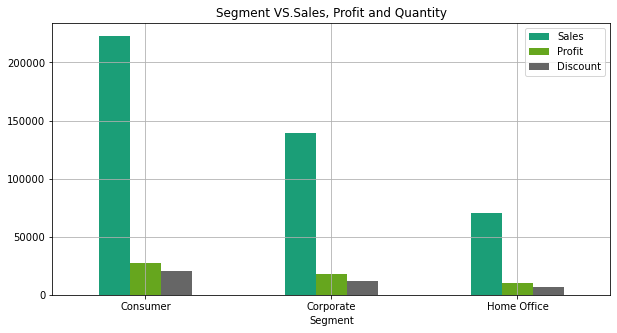

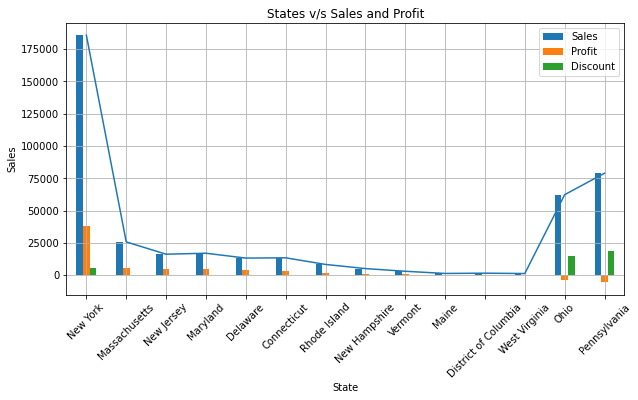

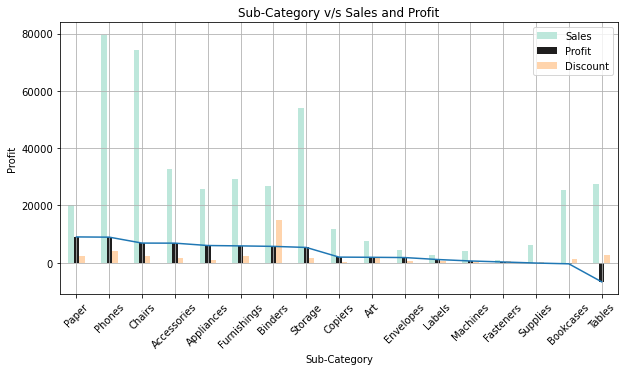

In [20]:
#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Customer Segments with Sales and profits column.
segment_east=df_east.groupby('Segment')[['Sales','Profit','Discount']].sum()
segment_east['Discount']=segment_east['Discount']*100
segment_east.plot(kind='bar', grid=True,figsize=(10,5), title='Segment VS.Sales, Profit and Quantity', fontsize=10, colormap='Dark2', rot=0)

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group American States with Sales and profits column.
state_east_prof=df_east.groupby('State')[['Sales', 'Profit','Discount']].sum()
state_east_prof=state_east_prof.sort_values(by=['Profit'], ascending=False)
state_east_prof['Discount']=state_east_prof['Discount']*100
state_east_prof.plot(kind='bar', grid=True, figsize=(10,5), title='States v/s Sales and Profit',rot=45)
sns.lineplot(data=state_east_prof['Sales'])

#By using groupby, we combine only the necessary columns together to get clearer visualizations.
#In this case we group Sub Categories with Sales and Profits column.
sub_cat_east=df_east.groupby('Sub-Category')[['Sales','Profit', 'Discount']].sum()
sub_cat_east=sub_cat_east.sort_values(by=['Profit'], ascending=False)
sub_cat_east['Discount']=sub_cat_east['Discount']*100
sub_cat_east.plot(kind='bar', grid=True, figsize=(10,5), title='Sub-Category v/s Sales and Profit', colormap='icefire', rot=45)
sns.lineplot(data=sub_cat_east['Profit'])

In this, we can observe that maximum products from the retail store are purchased by the Consumer segment, and the least by the Home office segment. The profits reported by the consumer segment are slightly higher than the Corporate and Home office segment

## Relationship between Sales and Profit

1) Majority of the sales are below 5000

2) Mostly profitable sales are above 5000

3) Sales below 5000 are in majority, but they have also resulted in majority of the losses

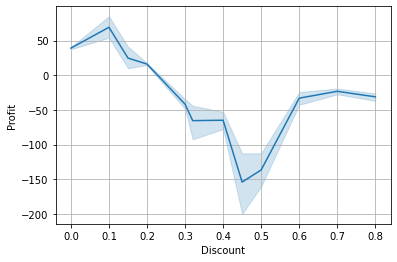

In [22]:
sns.lineplot(x='Discount', y='Profit', data=df)
plt.grid()
plt.show()